# Project Report
The objective of this project was to train an agent to pick the maximum number of good bananas while avoiding picking bad bananas. The agent is run in a simulated environment built uing Unity ML.

The reward function used to train the agent is as follows: Picking a good banana yields a reward of +1 and picking a bad banana yields it a reward of -1.

The agent's observation space is a 37 dimensional continuous space corresponding to 35 dimensions of ray perception and 2 dimensions for the agent's velocity. The 35 dimensions of ray perception are broken down as follows. There are 7 rays projecting from the agent at the following angles: [20,90,160,45,135,70,110], where 90 degrees is directly infront of the agent. Each ray is 5 dimensional and is projected into the scene and if it encounters one of 4 detectable objects (i.e. good banana, bad banana, wall, agent), the value at that posiiton in the array is set to 1. The 5th array position is the distance between the agent and the obstacle, and is given as a fraction of the ray length. Thus each ray is given as: [good banana, bad banana, wall, agent, distance]. For example, [0,1,1,0,0.2] means there is a bad banana located 20% of the distance along the ray with a wall behind it. The agent velocity is given as a two dimensional vector corresponding to velocity in the left/right direction (usually near 0) and velocity in the forward/backward direction (between 0 and 11.2). The action space is 4 dimensional corresponding to left, right, forward, and backward actions.

Because the state-space is continuous, we need a function approximator to represent the state-action value function. In this case we are using a neural network. Given the observations fully represent all the necessary information about the agent state, the observations are used as states. That is, observations are directly fed (without any augmentation) as input to a neural network. 

The neural network is a 3 layer network with 64 outputs for the first and second hidden layers, and the final output layer has 4 dimensions (corresponding to each of the actions).

Using a function approximator, we update the weights of the function approximator and the update equation for q-learning becomes:

w = qpi_hat(s,a,w) + alpha(maxa{qpi_hat(s',a,w)} - qpi_hat(s,a,w))*grad(qpi_hat(s,a,w), wrt w), where qpi_hat(s,a,w) is the action-value of taking action a from state s and then following the policy pi, alpha is the learning rate, s is the current state, s' is the next state, grad(qpi_hat(s,a,w), wrt w) is the derivative of qpi_hat(s,a,w) with respect to w, and maxa{qpi_hat(s',a,w)} is the TD target.

The policy update is such that for each visited state, with a probability epsilon we select a random action and with probability 1-epsilon we select an action with the maximum q-value (i.e. greedy policy). For linear function approximators, this approach works well in practice. That is the learning algorithm doesn't oscillate and instead converges to the optimal policy. However, for nonlinear function approximators like neural networks, the above approach can run in to instabilities. To help improve convergence, two modifications can be made and the resulting algorithm is known as Deep Q-Network (DQN). Here are the modifications:

1. Fixed Q Target: In the above q-learning algorithm using a function approximator, the TD target is also dependent on the network parameter w that we are trying to learn/update, and this can lead to instabilities. To address it, a separate network with identical architecture but different weights is used. And the weights of this separate target network are updated every 100 steps to be equal to the local network (i.e. the network that is continuously being learned).

2. The second modification is experience replay. Updating the weights as new states are being visited is fraught with problems. One is that we don't make use of past experiences. An experience is only used once and then discared. An even worse problem is that there is inherent correlation in the states being visited that needs to be broken; otherwise, the agent will not learn well. Both of these issues are address using experience replay where we have a memory buffer where all the expriences tuples (i.e. state, action, reward, and next state) are stored. And at each learning step, we randomly sample experiences form this buffer to break correlation. This also helps us learn from the same experience multiple times. This is especially useful when encountering some rare experiences.

Here is the agent's score as it was trained using the DQN algorithm.
DQN.png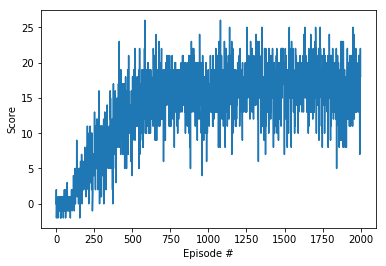

At the end of 2000 episodes, the 100 episode average score was 15, but the agent's behaviour was not smooth.

I then tried using the double DQN training algorith. DQN is based upon Q-learning algorithm with a deep neural network as a function approximator. However, one issue that Q-learning suffers from (regardless of using a function approximator or not) is the over estimation of the TD target due to the term maxa{qpi(s',a)}. The expected value of maxa{qpi(s',a)} is always greater than or equal to the maxa of the expected value of qpi(s',a). As a result, q-learning ends up overstimating the q-values thereby degrading learning efficiency.

Double DQN is the implementation of double q-learning using a deep neural network as the function approximator where we use the target network to find the action with the highest q-value, and use the q-value of that action using the local network.

Here is the agent's score as it was trained using the double DQN algorithm.
DDQN.png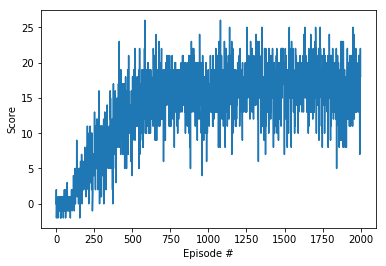
At the end of 2000 episodes, the 100 episode average score was 16.5 and the agent's behavior is alot smoother than with DQN.

A future goal is to try other training algorithms such as Dueling Networks and Prioritized Experience replay. Moreover, I would also want to train the agent directly from the raw pxels.
